In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
df = pd.read_csv("/home/sottimland/Documents/Projects/Data Science and ML/breastCancer-geneExpression/METABRIC_RNA_Mutation.csv", low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1904, 693)

#### Data Pre-Processing

##### Divide data into clinical data part and Genomic data Part

In [4]:
clinical_data = df.loc[:, df.columns[0:31]] #take all the rows but columns from 0 to 31st which contains the clinical information
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [5]:
genomic_data = df.iloc[:, 31:] # .iloc takes the integer argument without the slice operation
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


##### Finding Missing Data

In [6]:
clinical_null_values = clinical_data.isnull()
total_null = clinical_null_values.sum().sort_values(ascending=False)

percentage = clinical_null_values.sum() / clinical_null_values.count().sort_values(ascending=False)

missing_clinical_data = pd.concat([total_null, percentage], axis=1, keys=['total_null', 'percent_null'])
missing_clinical_data

#Outputs the total null values for each column and their corresponding percentage in total

,total_null,percent_null
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
oncotree_code,15,0.007878


In [7]:
genomic_null_values = genomic_data.isnull()
total_null = genomic_null_values.sum().sort_values(ascending=False)

percentage = genomic_null_values.sum() / genomic_null_values.count().sort_values(ascending=False)
#use pandas concat() function and create new columns with null values information
missing_genomic_data = pd.concat([total_null, percentage], axis=1, keys=['total_null', 'percentage_null'])
missing_genomic_data

,total_null,percentage_null
siah1_mut,0,0.0
brca1,0,0.0
brca2,0,0.0
palb2,0,0.0
pten,0,0.0
...,...,...
cdk1,0,0.0
ccne1,0,0.0
cdk2,0,0.0
cdc25a,0,0.0


In [8]:
sum_clinical, sum_genomic = 0, 0 
for i in missing_clinical_data['total_null']:
    sum_clinical += i
print(f'{sum_clinical} missing clinical data')

for i in missing_genomic_data['total_null']:
    sum_genomic += i
print(f'{sum_genomic} missing genomic data')

1100 missing clinical data
0 missing genomic data


##### There are 1100 missing clinical data while there is no missing genomic data. Let us fill the missing values.

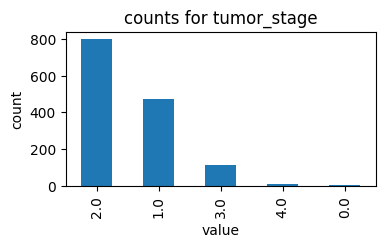

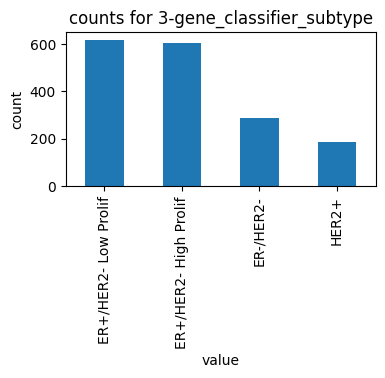

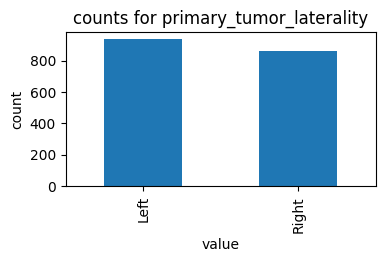

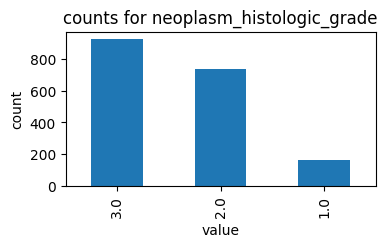

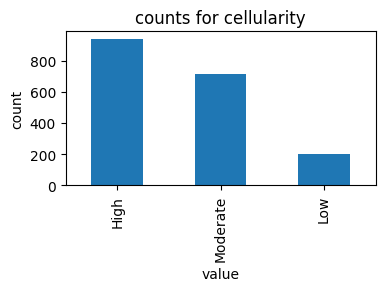

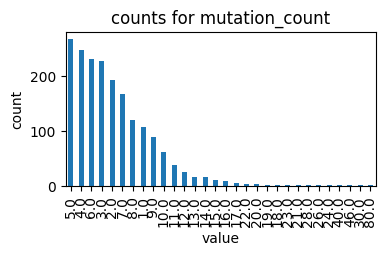

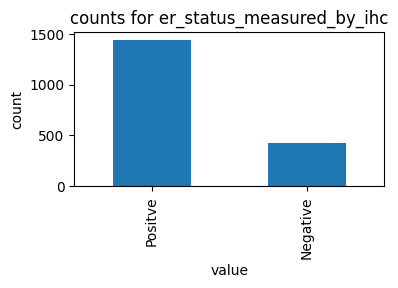

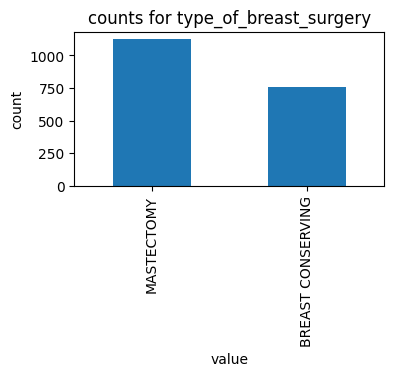

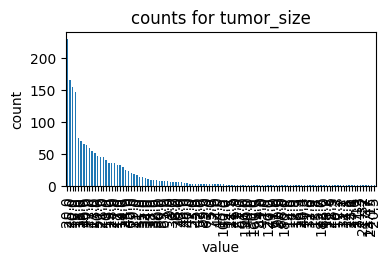

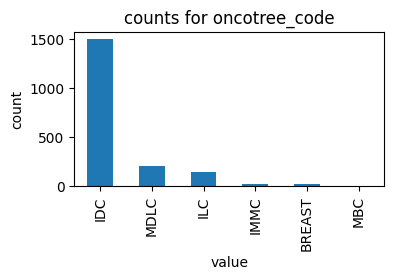

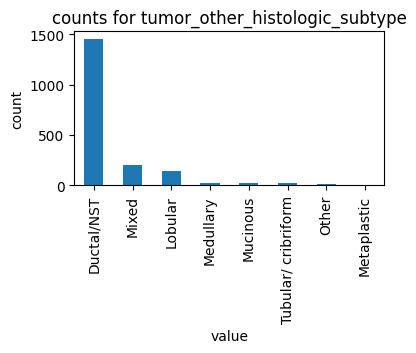

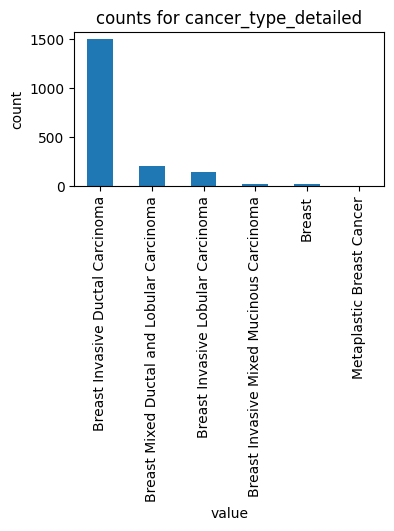

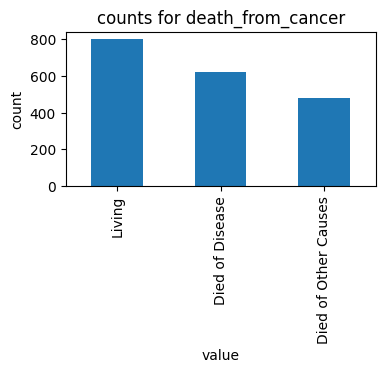

In [9]:
# Visualize the columns with missing values
for i in missing_clinical_data.index[0:13]: #we have 13 columns which have missing values
    plt.figure(figsize=(4,2))    
    df[i].value_counts().plot.bar()
    plt.title(f"counts for {i}")
    plt.xlabel('value')
    plt.ylabel('count')
    plt.show()
    

In [10]:
for i in missing_clinical_data.index[0:13]:
    #fill the missing values in a column with mode of that column
    df[i].fillna(df[i].mode()[0], inplace=True) #mode()[0] is used to select the first mode for that column coz there might be more than one mode

#Check if all the null values has been handeled in dataset
df.isnull().sum().value_counts()

/tmp/ipykernel_10504/155342542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True) #mode()[0] is used to select the first mode for that column coz there might be more than one mode


0    693
Name: count, dtype: int64

##### Peform Label Encoding on Ordial Data and One-Hot Encoding on Nominal Data

Label encoding (ordinal) and one-hot encoding (nominal) are two different methods for converting categorical data into numerical data.

In [11]:
"""Label Encoding: converts each unique category value in a feature to a unique integer. It maintains an inherent order among the categories. 
   Eg. Column with values ["low", "medium", "high"]. Label encoding would convert these to integers such as [0, 1, 2]. """

ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]

ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,claudin-low,NEUTRAL,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,NEUTRAL,LumA,NEUTRAL,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [12]:
from sklearn.preprocessing import LabelEncoder 

#apply label encoder to transform the columns
label_enc = ordinal_df.apply(LabelEncoder().fit_transform)
label_enc.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,2,6,2,0,4,2,2
1,0,1,0,2,2,2,0,4,0,2
2,0,1,1,2,3,2,0,3,1,0
3,2,4,1,2,3,2,4,10,1,2
4,0,4,1,2,3,2,4,10,0,0


In [13]:
""" One-hot encoding: converts each unique category value in a feature to a new binary feature (column) that indicates the presence (1) or absence (0) of each category.
    For example, consider a column with values ["red", "green", "blue"]. One-hot encoding would convert these to separate columns, each with binary values:
"""
nomial_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nomial_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [14]:
onehot_enc = pd.get_dummies(data = nomial_df, drop_first=True).astype(int)
onehot_enc.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


##### Add the label encoded and one hot encoded columns while dropping their corresponding columns before transformation from orginal dataframe
Specifically we drop the ordial_df and nominal_df and add the label_enc and onehot_enc columns to original dataframe

In [15]:
#Drop the columns in ordinal and add the label encoded columns
columns_to_drop = ordinal_df.columns.tolist()
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df = df.join(label_enc)

# Drop the columns in nominal and add the one hot encoded columns
columns_to_drop2 = nomial_df.columns.tolist()
df.drop(columns=columns_to_drop2, inplace=True, errors='ignore')
df = df.join(onehot_enc)

df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


##### Null Values have been handled. Also, features have been encoded into numerical values

Now, let us round off the age and convert to integer format

In [16]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil).astype(int)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7,...,1,0,0,1,0,1,0,0,0,0
1,2,44,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5,...,1,0,1,1,1,1,0,0,0,0
2,5,49,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5,...,1,0,1,1,1,1,0,0,0,0
3,6,48,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5,...,1,0,1,1,1,0,0,0,0,1
4,8,77,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7,...,1,0,0,1,1,0,0,0,0,1


##### Drop the columns not required

In [17]:
df.drop(['patient_id', 'cancer_type'], axis=1, inplace=True)

# Colums with string values
string_col= df.select_dtypes(include=['object']).columns
print(string_col.value_counts().sum())
print(string_col)

173
Index(['pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut',
       'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=173)


##### Correlation Matrix between Numerical Clinical Data



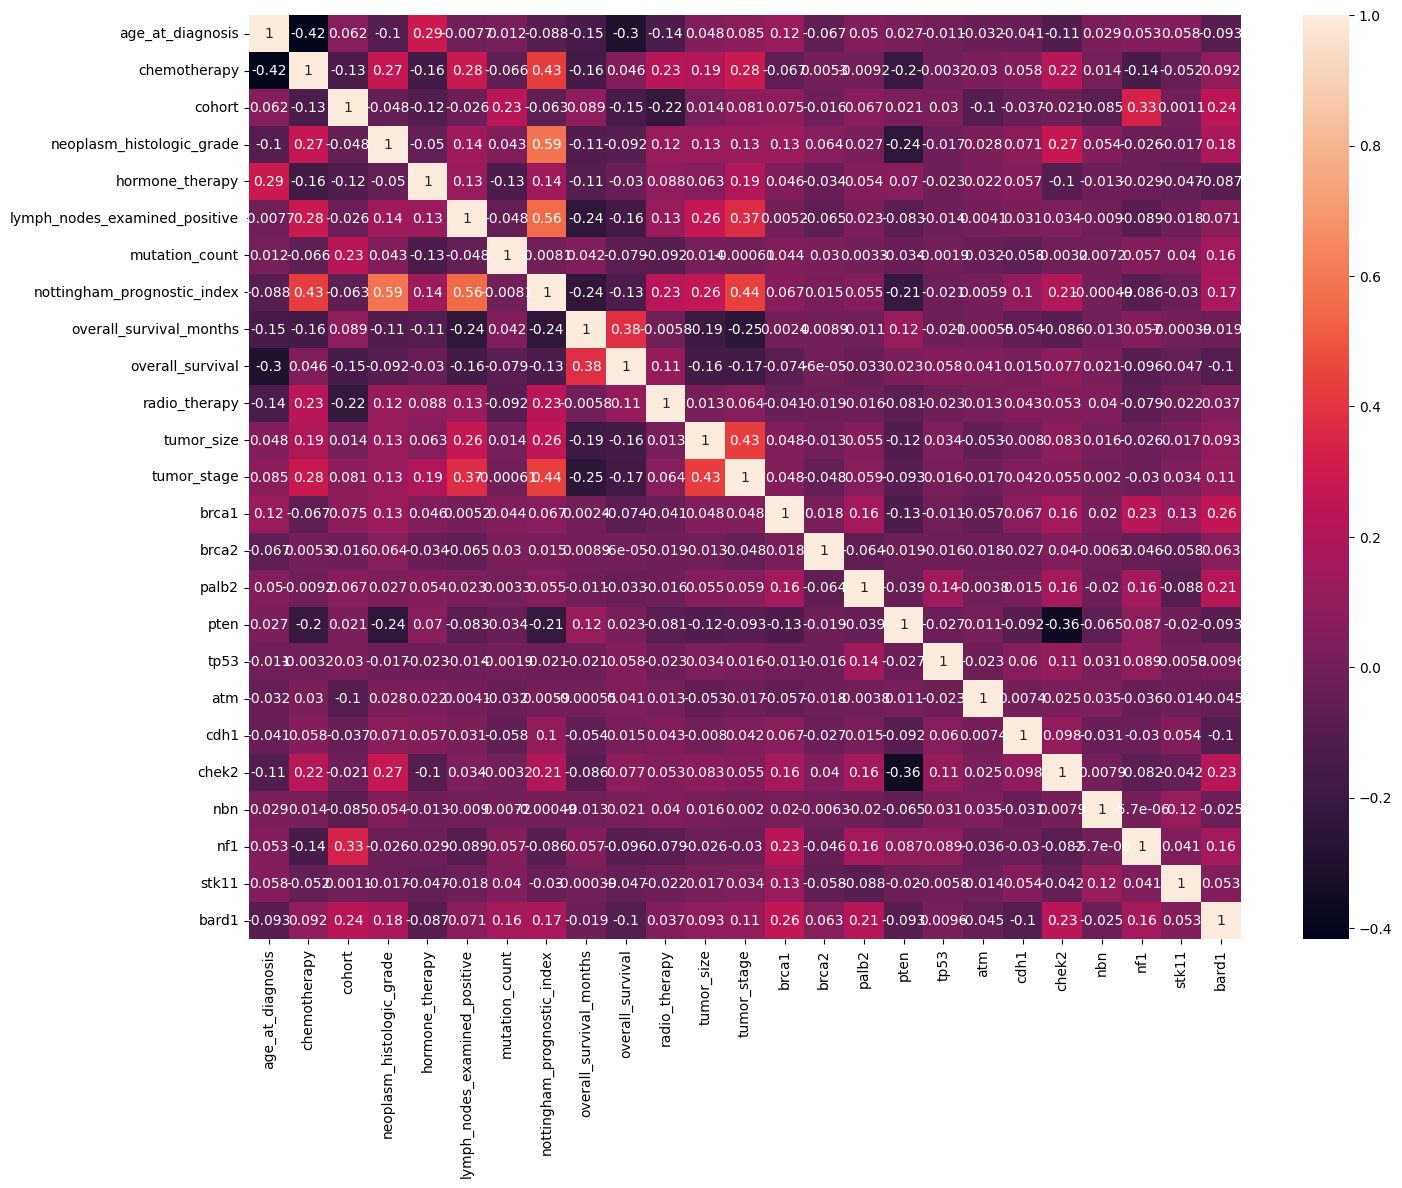

In [18]:
new_df = df[df.columns[0:25]]

corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
new_df.shape

(1904, 25)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1904 non-null   int64  
 1   chemotherapy                   1904 non-null   int64  
 2   cohort                         1904 non-null   float64
 3   neoplasm_histologic_grade      1904 non-null   float64
 4   hormone_therapy                1904 non-null   int64  
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   mutation_count                 1904 non-null   float64
 7   nottingham_prognostic_index    1904 non-null   int64  
 8   overall_survival_months        1904 non-null   float64
 9   overall_survival               1904 non-null   int64  
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1904 non-null   float64
 12  tumor_stage                    1904 non-null   f

#### Let us Update the Dataset


In [21]:

# First, drop the columns from df
column_drop = df[df.columns[0:25]].columns
df.drop(column_drop, axis=1, inplace=True)
# Join new_df to df
final_new_df = df.join(new_df)
# Reorder columns to put new_df columns at the beginning
new_column_order = list(new_df.columns) + [col for col in final_new_df.columns if col not in new_df.columns]
final_new_df = final_new_df[new_column_order]

final_new_df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76,0,1.0,3.0,1,10.0,5.0,7,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44,0,1.0,3.0,1,0.0,2.0,5,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49,1,1.0,2.0,1,1.0,2.0,5,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48,1,1.0,2.0,1,3.0,1.0,5,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77,1,1.0,3.0,1,8.0,2.0,7,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


##### Type of Treatments and Survivals

In [22]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

died = final_new_df[final_new_df['overall_survival']==0]
# died

survived = final_new_df[final_new_df['overall_survival']==1]
survived

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76,0,1.0,3.0,1,10.0,5.0,7,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44,0,1.0,3.0,1,0.0,2.0,5,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
3,48,1,1.0,2.0,1,3.0,1.0,5,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
6,57,1,1.0,2.0,1,1.0,4.0,5,164.333333,1,...,1,0,0,1,1,1,0,0,0,0
11,71,0,1.0,1.0,1,0.0,3.0,3,163.533333,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,62,0,4.0,1.0,1,4.0,9.0,5,185.333333,1,...,1,0,0,0,1,1,0,0,0,0
1883,57,0,4.0,2.0,1,3.0,3.0,5,187.033333,1,...,1,0,0,0,1,1,0,0,0,0
1886,64,0,4.0,2.0,1,6.0,6.0,6,195.533333,1,...,1,0,0,0,1,1,0,0,0,0
1897,57,0,4.0,3.0,1,1.0,5.0,6,199.233333,1,...,1,0,0,0,1,1,0,0,0,0


##### Pattern of Survival and Death according to the various Treatment done

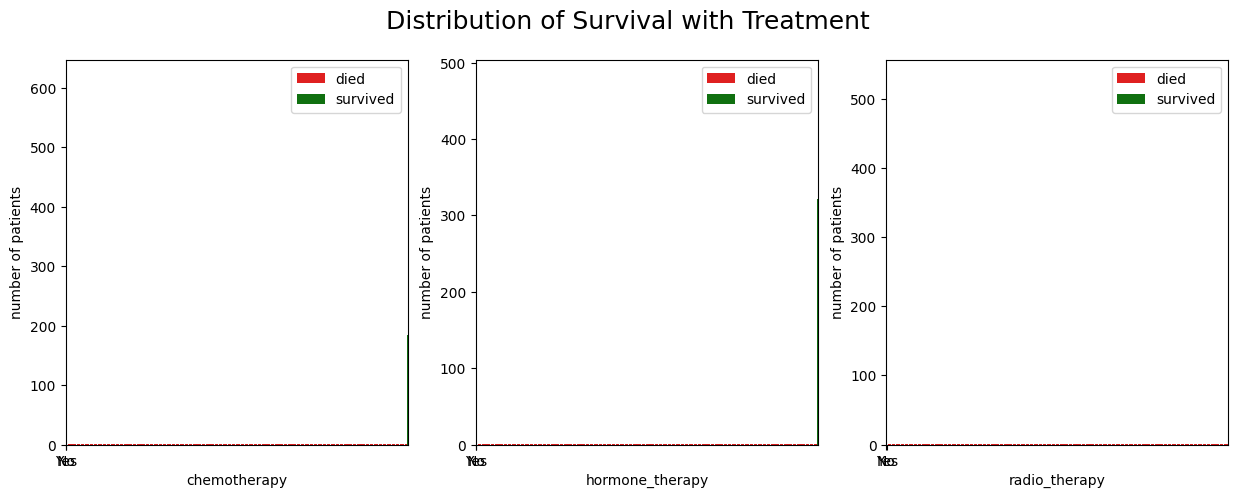

In [23]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
fig.suptitle("Distribution of Survival with Treatment", fontsize = 18)

k=0
for i in treatments:
    sns.countplot(died[i], color='red', label='died', ax=ax[k])
    sns.countplot(x= survived[i], color='green', label='survived', ax=ax[k])
    ax[k].legend()
    ax[k].set(xticks=[0, 1], xticklabels=['No', 'Yes'])

    ax[k].set_xlabel(i)
    ax[k].set_ylabel('number of patients')

    k += 1
plt.show()



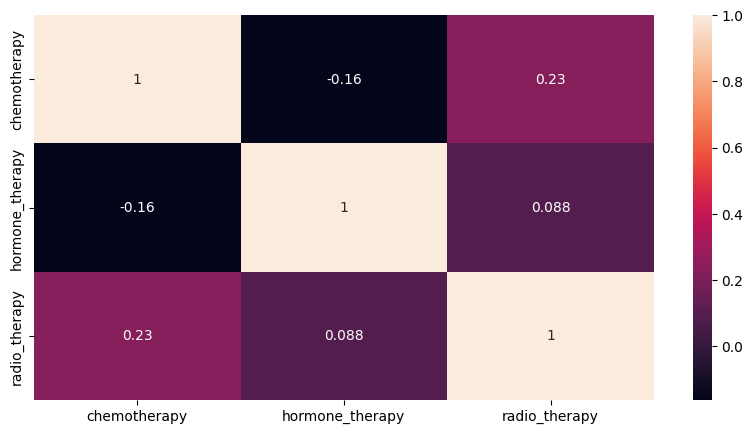

In [24]:
#Correlation with the treatment list
corr_mat = final_new_df[treatments].corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_mat, annot=True)
plt.show()

[17, 119, 135, 75, 253, 9, 83]


/home/sottimland/miniconda3/envs/datascience/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


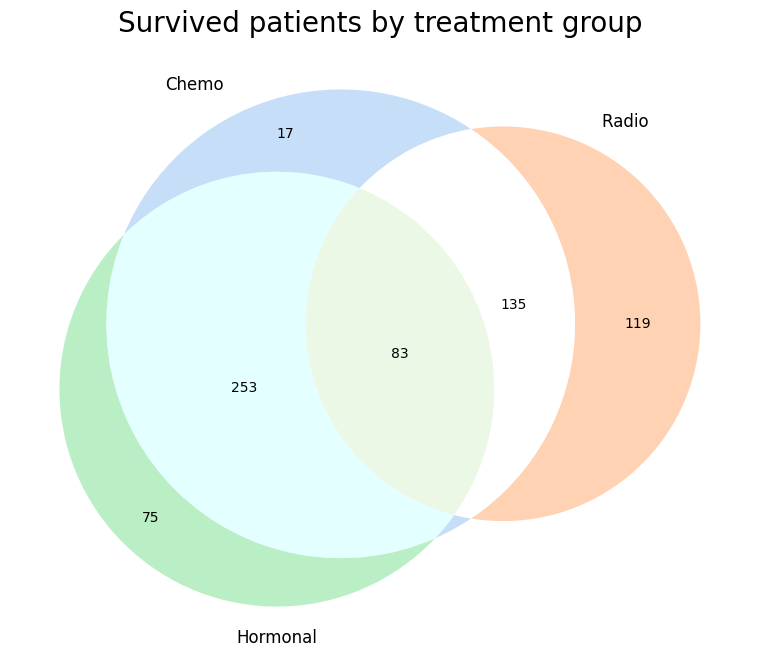

In [25]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])

print(sizes)  #Prints the list with people survived in each category

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(10,8))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

ax.set_title("Survived patients by treatment group", size=20)
plt.show()


##### Genomic Data Information

Idea is to check all the columns with string values so that we can convert them to numeric values. This will enable us to pass the data to model


In [26]:
genomic_data = final_new_df.select_dtypes(include=['object','string'])
genomic_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
genomic_col = genomic_data.columns
genomic_col


Index(['pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut',
       'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=173)

In [28]:
for column in genomic_col:
    df[column] = df[column].astype(str)  # Ensure string type
    df.loc[df[column] != '0', column] = 1
    df.loc[df[column] == '0', column] = 0
    df[column] = df[column].astype(int)  # Convert back to integer

# df['pik3ca_mut'].head()

genomic_data_modified = df[genomic_col]
genomic_data_modified



,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
final_new_df.drop(genomic_data, axis=1, inplace=True)
final_new_df = final_new_df.join(genomic_data_modified)
final_new_df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,76,0,1.0,3.0,1,10.0,5.0,7,140.500000,1,...,0,0,0,0,0,0,0,0,0,0
1,44,0,1.0,3.0,1,0.0,2.0,5,84.633333,1,...,0,0,0,0,0,0,0,0,0,0
2,49,1,1.0,2.0,1,1.0,2.0,5,163.700000,0,...,0,0,0,0,0,0,0,0,0,0
3,48,1,1.0,2.0,1,3.0,1.0,5,164.933333,1,...,0,0,0,0,0,0,0,0,0,0
4,77,1,1.0,3.0,1,8.0,2.0,7,41.366667,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,44,0,4.0,3.0,1,1.0,4.0,6,196.866667,1,...,0,0,0,0,0,0,0,0,0,0
1900,43,0,4.0,3.0,0,1.0,6.0,6,44.733333,0,...,0,0,0,0,0,0,0,0,0,0
1901,63,0,4.0,3.0,1,45.0,4.0,7,175.966667,0,...,0,0,0,0,0,0,0,0,0,0
1902,62,0,4.0,2.0,1,12.0,15.0,6,86.233333,0,...,0,0,0,0,0,0,0,0,0,0


##### Let us Inspect the the data Label: death_from_cancer

In [30]:
df['death_from_cancer'].unique() #Unique values present in the y-label

array([2, 0, 1])

In [31]:
df['death_from_cancer'].head(10)

0    2
1    2
2    0
3    2
4    0
5    0
6    2
7    1
8    1
9    0
Name: death_from_cancer, dtype: int64

In [32]:
test_df = final_new_df.select_dtypes(include=['object','string']).columns
test_df

Index([], dtype='object')

In [33]:
# Normalization: MinMax Scalar on all the features in the dataset except the label. Transform numerical features to a common scale b/w 0 and 1
from sklearn.preprocessing import MinMaxScaler

normalized = final_new_df.loc[:, final_new_df.columns != 'death_from_cancer'].values
normalized = MinMaxScaler().fit_transform(normalized) #It is in 2D array
normalized_df = pd.DataFrame(normalized)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,687,688,689,690,691,692,693,694,695,696
0,0.720000,0.0,0.0,1.0,1.0,0.222222,0.050633,1.000000,0.395552,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.293333,0.0,0.0,1.0,1.0,0.000000,0.012658,0.666667,0.238270,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.360000,1.0,0.0,0.5,1.0,0.022222,0.012658,0.666667,0.460867,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.346667,1.0,0.0,0.5,1.0,0.066667,0.000000,0.666667,0.464339,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.733333,1.0,0.0,1.0,1.0,0.177778,0.012658,1.000000,0.116460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
normalized_df.shape

(1904, 697)

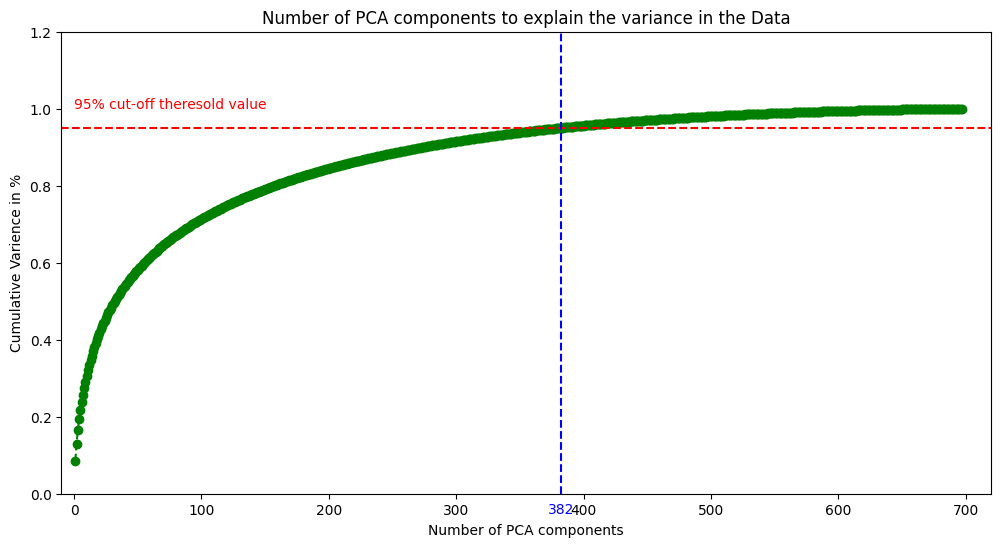

In [35]:
#Peform PCA on the normalized data to know how many principle components we need to take
from sklearn.decomposition import PCA
data_scaled = normalized_df
pca = PCA().fit(data_scaled)

fig, ax = plt.subplots(figsize=(12, 6))
xi = np.arange(1, 698, step=1)
y = np.cumsum(pca.explained_variance_ratio_) 
"""Each value in explained_variance_ratio_ corresponds to the proportion of the dataset's total variance that is explained by that particular principal component.
    The values are ordered, meaning the first value represents the variance explained by the first principal component (the one capturing the most variance), 
    the second value represents the variance explained by the second principal component, and so on.
"""
n_components_95 = np.argmax(y >= 0.95) + 1

plt.ylim(0, 1.2) #limit for the y-axis to 1.2 so that 100% is clearly seen 
plt.xlim(-10, 720) 
plt.plot(xi, y, marker='o', linestyle='--', color='green')

plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Varience in %')
plt.title('Number of PCA components to explain the variance in the Data')

plt.axhline(y=0.95, color = 'red', linestyle =  '--')
plt.text(0, 1, '95% cut-off theresold value', fontsize=10, color= 'red' ) #For capturing the 95 of the variance from the data

plt.axvline(x=n_components_95, color='blue', linestyle='--')
plt.text(n_components_95, -0.05, f'{n_components_95}', fontsize=10, color='blue', ha='center')

plt.show()


##### From the above graph, total of 382 Principle Components capture cumulative variance of the data. It means we can use these Principle components as the features to our dataset for building the models.
#### PCA Implementation

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 382)
principal_comp = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_comp)
principal_df

,0,1,2,3,4,5,6,7,8,9,...,372,373,374,375,376,377,378,379,380,381
0,0.117188,1.846051,0.590324,-0.382677,0.099298,1.146762,-0.201275,0.037312,0.957256,0.899507,...,0.195266,0.021635,-0.051256,-0.066631,0.060571,0.012247,0.013223,-0.008326,-0.028253,-0.005168
1,0.436684,0.444479,-1.057738,-0.651938,0.770024,-0.466848,0.184547,0.069224,0.269011,0.495132,...,-0.006889,-0.017336,-0.100521,-0.153463,-0.086400,-0.018452,0.008200,-0.008604,-0.021234,0.014642
2,0.356782,1.747670,-0.774065,0.700856,-0.768363,-1.381646,1.353461,-0.479762,0.294641,0.589450,...,-0.042776,0.069600,0.057750,-0.042899,0.002557,-0.017656,-0.047342,0.001034,0.041838,-0.124487
3,0.467805,1.761198,-0.658805,0.190492,-0.053128,-0.931845,0.702489,-1.922501,0.047605,0.608685,...,-0.157174,-0.091628,-0.030662,-0.177802,0.087882,0.094137,0.079666,-0.000471,0.027456,0.026479
4,-0.015302,0.288215,-1.299970,-0.150070,-0.579434,0.681738,0.015756,-0.683731,-1.186150,0.858433,...,0.000210,-0.045059,0.163524,0.076576,-0.107256,0.106431,0.004145,-0.106440,0.032437,0.109628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.806015,1.616570,-0.166409,-0.250685,0.477963,-0.657099,0.340372,-0.219252,-0.664073,0.315997,...,0.027026,0.076186,-0.044032,0.025511,0.008792,-0.084926,0.093723,0.001187,-0.093412,-0.104250
1900,-0.992493,-0.376529,-1.336767,1.089986,0.175763,-0.407650,-0.312266,-0.382607,0.162638,-0.362722,...,0.026896,0.032304,-0.128763,-0.060161,-0.080644,-0.034714,-0.114860,-0.047391,-0.001962,0.001132
1901,0.262061,0.225821,-1.903202,0.018500,-0.561287,0.276059,0.417011,-0.210495,0.195750,-0.216573,...,-0.045221,0.036442,0.006264,0.122221,-0.127555,0.173440,-0.001517,0.003965,0.004151,0.060689
1902,0.681449,0.053640,-1.015817,0.212224,-0.960428,0.111681,0.073521,-0.047968,0.725218,-0.472634,...,-0.012548,-0.194640,-0.029375,-0.032657,0.128218,0.005971,0.017506,-0.034819,0.021587,0.071655


##### Building the Model

In [37]:
from sklearn.model_selection import train_test_split
X = principal_df
y = final_new_df['death_from_cancer']

#Divide the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

def hyper_param_tuning(name, model, model_params, X_train, y_train, cv):
    grid_cv = GridSearchCV(model, model_params, n_jobs=-1, cv=cv)
    grid_cv_model = grid_cv.fit(X_train, y_train)
    print(name)
    print('Best Parameters = ', grid_cv_model.best_params_)
    print('Best Model Score = ', grid_cv_model.best_score_)
    print(grid_cv_model)
    return grid_cv_model.best_estimator_


def model_metrics(model, X_train, y_train, X_test, y_test):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #StratifiedKFold ensures that each fold has approximately the same proportion of class labels as the original dataset. This is especially important for imbalanced datasets, where some classes may be underrepresented.
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV Scores = ", results)
    print("CV Standard Deviation = ", results.std())
    print("CV Mean Score = ", results.mean())
    model.fit(X_train, y_train)
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))

    #Model Prediction
    pred = model.predict(X_test)
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print()
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    print()
    return results.mean(), results.std()



##### KNN Classifier Model


In [39]:
from sklearn.neighbors import KNeighborsClassifier

results = []
knn_params = {'n_neighbors': [5,15,25,30,35,40,100],
                "weights" : ["uniform" , "distance"]
            }

knn_name = 'KNN Classifier Model'
knn_model = KNeighborsClassifier()
final_model = hyper_param_tuning(knn_name, knn_model, knn_params, X_train, y_train, 4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
results.append([result_std, result_mean, result_std])

KNN Classifier Model
Best Parameters =  {'n_neighbors': 40, 'weights': 'uniform'}
Best Model Score =  0.7097889901920155
GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 30, 35, 40, 100],
                         'weights': ['uniform', 'distance']})
CV Scores =  [0.69508197 0.72786885 0.65901639 0.72039474 0.67763158]
CV Standard Deviation =  0.02575560430054215
CV Mean Score =  0.6959987057808456
Train score:    0.7347340774786605
Test score:     0.6981627296587927

Confusion Matrix: 
[[ 82  23  23]
 [ 45  38  23]
 [  1   0 146]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       128
           1       0.62      0.36      0.46       106
           2       0.76      0.99      0.86       147

    accuracy                           0.70       381
   macro avg       0.67      0.66      0.65       381
weighted avg       0.68      0.70      0.67 

#### Logistic Regression Model


In [40]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty': ['l1', 'l2'], # l1 = Ridge Regression (adds a penalty equal to the steeper slope to remove the overfitting), l2 = Lasso Regression
    "C": np.logspace(-2, 4, 100)  # Range of regularization strengths
}

lr_name = "Logestic Regression Model"
lr_model = LogisticRegression(random_state=42)
final_model = hyper_param_tuning(lr_name, lr_model, lr_params, X_train, y_train, 4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
results.append([result_std, result_mean, result_std])




/home/sottimland/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sottimland/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sottimland/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/sottimland/miniconda3/envs/datascience/lib/python3.9/site-pack

Logestic Regression Model
Best Parameters =  {'C': np.float64(0.02009233002565047), 'penalty': 'l2'}
Best Model Score =  0.8181223235253487
GridSearchCV(cv=4, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.11130831e-02,
       9.32603347e-0...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04]),
                 

#### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [1, 2, 3, 4, 5, 8, 10, 15, 20],
    'criterion': ['gini', 'entropy']
    # 'splitter': ['best', 'random'],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

dt_name = "Decision Tree Model"
dt_model = DecisionTreeClassifier(random_state=42)
final_model = hyper_param_tuning(dt_name, dt_model, dt_params, X_train, y_train, 4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
results.append([result_std, result_mean, result_std])

Decision Tree Model
Best Parameters =  {'criterion': 'entropy', 'max_depth': 5}
Best Model Score =  0.6119336234286504
GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 8, 10, 15, 20]})
CV Scores =  [0.62622951 0.64918033 0.62295082 0.59539474 0.57236842]
CV Standard Deviation =  0.02662206878201212
CV Mean Score =  0.6132247627264884
Train score:    0.7189757058437295
Test score:     0.6509186351706037

Confusion Matrix: 
[[ 95  15  18]
 [ 55  32  19]
 [ 25   1 121]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.54      0.74      0.63       128
           1       0.67      0.30      0.42       106
           2       0.77      0.82      0.79       147

    accuracy                           0.65       381
   macro avg       0.66      0.62      0.61       381
weighted avg       0.66      0.

#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_features':[2, 3, 5, 7, 8],
    #'max_depth': [1, 2, 3, 4, 5, 8],
    }

rf_name = 'Random Forest Classifier Model:'
rf_model = RandomForestClassifier(n_estimators=100)
final_model = hyper_param_tuning(rf_name, rf_model, rf_params, X_train, y_train,5)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
results.append([result_std, result_mean, result_std])

Random Forest Classifier Model:
Best Parameters =  {'max_features': 8, 'n_estimators': 200}
Best Model Score =  0.5745405522001725
GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [2, 3, 5, 7, 8],
                         'n_estimators': [10, 50, 100, 150, 200, 250]})
CV Scores =  [0.56065574 0.55081967 0.53442623 0.53947368 0.57565789]
CV Standard Deviation =  0.014842799203805147
CV Mean Score =  0.5522066436583262
Train score:    1.0
Test score:     0.5590551181102362

Confusion Matrix: 
[[ 62   4  62]
 [ 43   5  58]
 [  1   0 146]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.58      0.48      0.53       128
           1       0.56      0.05      0.09       106
           2       0.55      0.99      0.71       147

    accuracy                           0.56       381
   macro avg       0.56      0.51      0.44       381
weighted avg       0.56      0.56      0.48     

#### Naive Bias Model


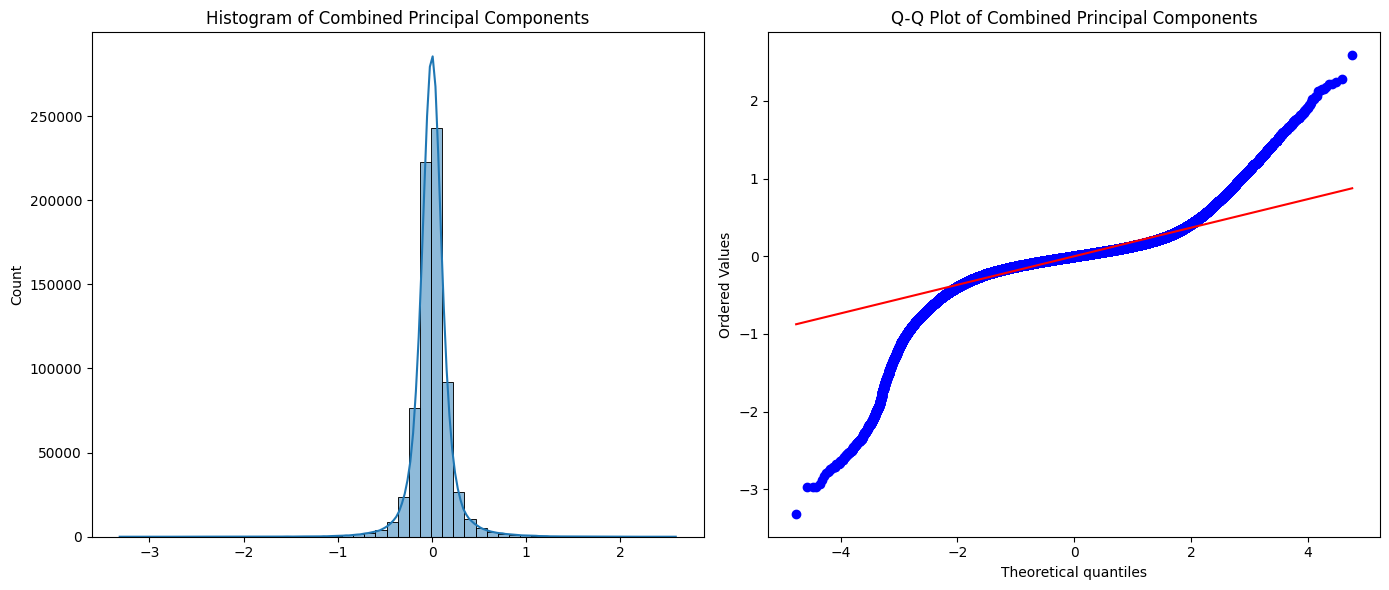

In [49]:
#Let us check if my features follow the noramal distribution or not to confirm if we can apply Gaussian Naive Bias Classifier model

import scipy.stats as stats

# Combine all principal components into a single array
combined_principal_components = principal_df.values.flatten()

# Plot Histogram and Q-Q Plot for the combined data
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_principal_components, kde=True, bins=50)
plt.title('Histogram of Combined Principal Components')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(combined_principal_components, dist="norm", plot=plt)
plt.title('Q-Q Plot of Combined Principal Components')

plt.tight_layout()
plt.show()



##### We can see that combined PCA histogram plot shows that features follow the normal distribution.
##### Apply Gaussian Naive Bias Model (Gaussian Naive Bias Model is used when the features are normally distributed.)

In [50]:
from sklearn.naive_bayes import GaussianNB

nb_parms = {
    'var_smoothing' : np.logspace(0, -9, num=100)
}

nb_name = "Gaussian Naive Bias Model"
nb_model = GaussianNB()
final_model = hyper_param_tuning(nb_name, nb_model, nb_parms, X_train, y_train, 4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
results.append([result_std, result_mean, result_std])

"""Role of var_smoothing
var_smoothing adds a small value to the variance of each feature to prevent it from being exactly zero or too close to zero. 
This small value is a portion of the largest variance among all features. This technique is also known as regularization.

Example with var_smoothing

Let's say we have the following variances for three features:

    σy,12=0.01σy,12​=0.01
    σy,22=0.05σy,22​=0.05
    σy,32=0.10σy,32​=0.10

The largest variance among these features is 0.100.10.

If we set var_smoothing to 0.00010.0001, the adjusted variances become:

    σy,12=0.01+0.0001⋅0.10=0.01+0.00001=0.01001σy,12​=0.01+0.0001⋅0.10=0.01+0.00001=0.01001
    σy,22=0.05+0.0001⋅0.10=0.05+0.00001=0.05001σy,22​=0.05+0.0001⋅0.10=0.05+0.00001=0.05001
    σy,32=0.10+0.0001⋅0.10=0.10+0.00001=0.10001σy,32​=0.10+0.0001⋅0.10=0.10+0.00001=0.10001
"""

Gaussian Naive Bias Model
Best Parameters =  {'var_smoothing': np.float64(0.2848035868435802)}
Best Model Score =  0.6224323110926924
GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})
CV Scores =  [0.63934

##### Mean score is preety less = 62%. It is to be noted that Naive Bias model works best with dataset with less features while our dataset has lots of features.

In [51]:
print(results)

[[np.float64(0.023042586387603734), np.float64(0.6953451251078515), np.float64(0.023042586387603734)], [np.float64(0.016634528412446354), np.float64(0.8141867989646248), np.float64(0.016634528412446354)], [np.float64(0.012124909568196002), np.float64(0.6283606557377049), np.float64(0.012124909568196002)], [np.float64(0.015346111719637656), np.float64(0.5699439171699741), np.float64(0.015346111719637656)], [np.float64(0.0626136279764139), np.float64(0.6166048317515099), np.float64(0.0626136279764139)]]


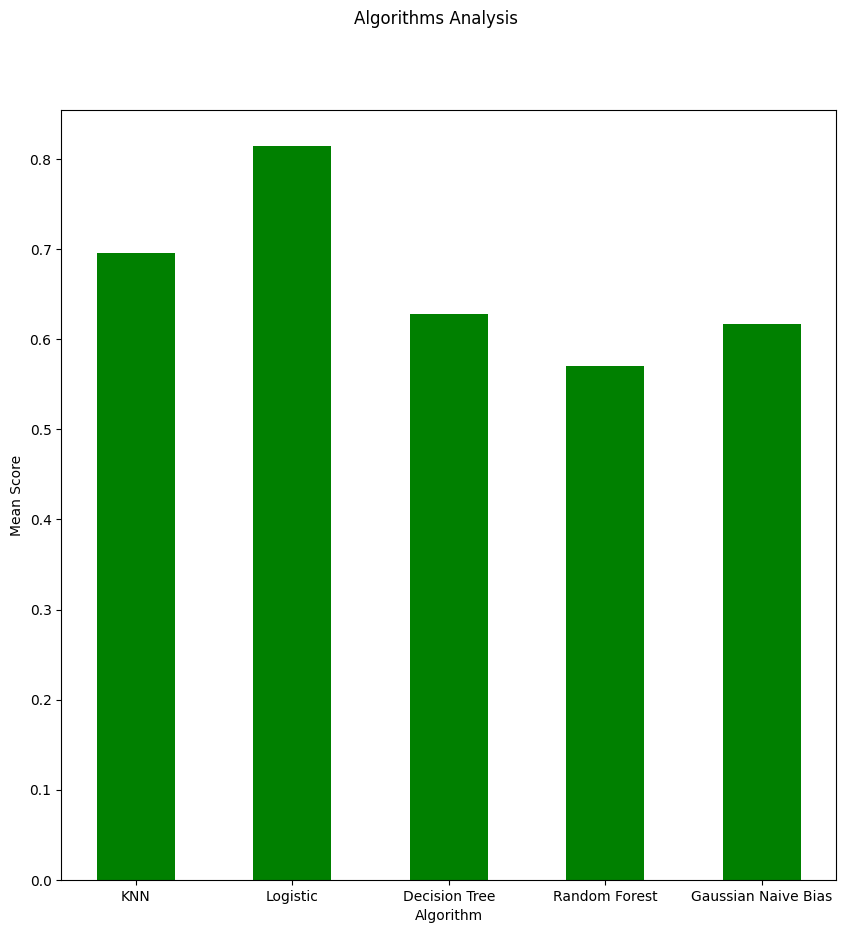

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Results from models implemented above
results = [
    [np.float64(0.023042586387603734), np.float64(0.6953451251078515), np.float64(0.023042586387603734)], 
    [np.float64(0.016634528412446354), np.float64(0.8141867989646248), np.float64(0.016634528412446354)], 
    [np.float64(0.012124909568196002), np.float64(0.6283606557377049), np.float64(0.012124909568196002)], 
    [np.float64(0.015346111719637656), np.float64(0.5699439171699741), np.float64(0.015346111719637656)],
    [np.float64(0.0626136279764139), np.float64(0.6166048317515099), np.float64(0.0626136279764139)],
    [np.float64(0.01769799199591526), np.float64(0.8128753235547886), np.float64(0.01769799199591526)]
]

# Algorithm names corresponding to the results
names = ['KNN', 'Logistic', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bias', 'Support Vector Machine']  # Ensure names match the number of results

# Initialize the figure
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithms Analysis')

# Extract the mean scores for plotting
new_results = [result[1] for result in results]

# Plot the bar chart
plt.bar(names, new_results, color='green', width=0.5)
plt.xlabel('Algorithm')
plt.ylabel('Mean Score')
plt.show()




##### Support Vector Machine 

In [55]:
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm_name = 'SVM Classifier Model'
svm_model = SVC()
final_svm_model = hyper_param_tuning(svm_name, svm_model, svm_params, X_train, y_train, 4)
result_mean, result_std = model_metrics(final_svm_model, X_train, y_train, X_test, y_test)

# Collect results for plotting
results.append([result_std, result_mean, result_std])
names.append(svm_name)


SVM Classifier Model
Best Parameters =  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Model Score =  0.8115502831882857
GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})
CV Scores =  [0.81967213 0.81311475 0.79672131 0.84210526 0.79276316]
CV Standard Deviation =  0.01769799199591526
CV Mean Score =  0.8128753235547886
Train score:    0.9028233749179252
Test score:     0.8241469816272966

Confusion Matrix: 
[[ 98  30   0]
 [ 37  69   0]
 [  0   0 147]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       128
           1       0.70      0.65      0.67       106
           2       1.00      1.00      1.00       147

    accuracy                           0.82       381
   macro avg       0.81      0.81      0.81       381
weighted avg       0.82      0.82    

##### SVM performed nearly same as Logistic Regression. This is becasue both of them works in the similar appraoch while SVM works well with high dimension data. Not only does SVM works on the concept of drawing the hyperplane to categorise to different classes, it also includes the concept of marginal distance unlike logistic regression.

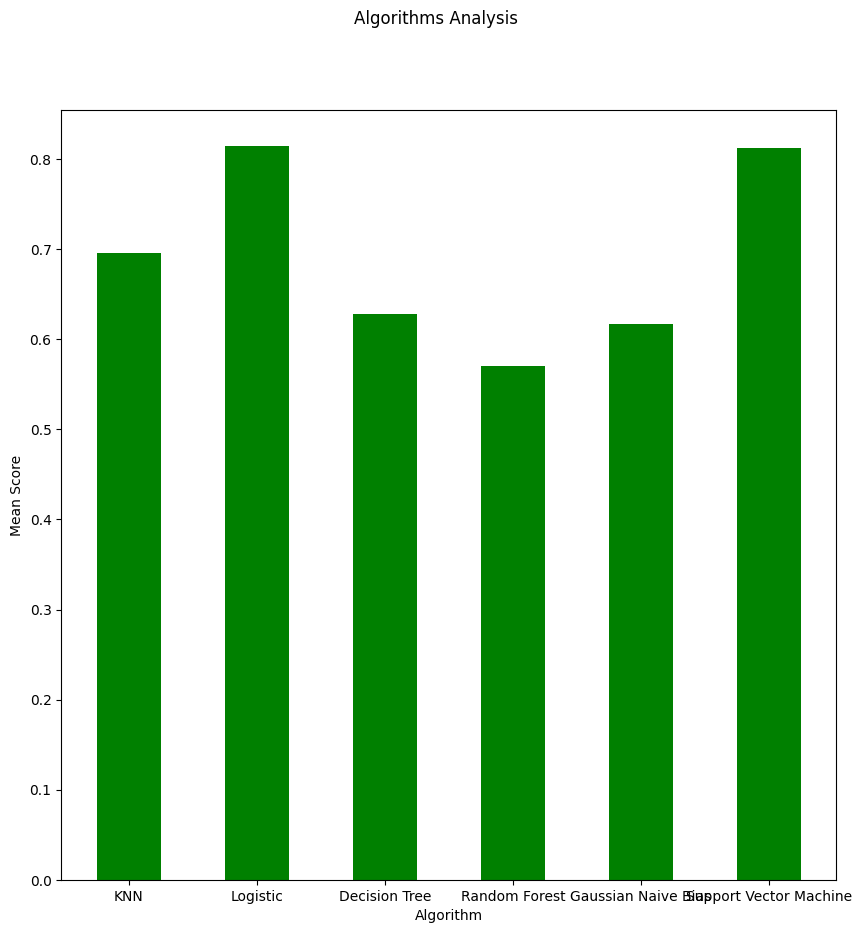

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Results from models implemented above
results = [
    [np.float64(0.023042586387603734), np.float64(0.6953451251078515), np.float64(0.023042586387603734)], 
    [np.float64(0.016634528412446354), np.float64(0.8141867989646248), np.float64(0.016634528412446354)], 
    [np.float64(0.012124909568196002), np.float64(0.6283606557377049), np.float64(0.012124909568196002)], 
    [np.float64(0.015346111719637656), np.float64(0.5699439171699741), np.float64(0.015346111719637656)],
    [np.float64(0.0626136279764139), np.float64(0.6166048317515099), np.float64(0.0626136279764139)],
    [np.float64(0.01769799199591526), np.float64(0.8128753235547886), np.float64(0.01769799199591526)]
]

# Algorithm names corresponding to the results
names = ['KNN', 'Logistic', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bias', 'Support Vector Machine']  # Ensure names match the number of results

# Initialize the figure
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithms Analysis')

# Extract the mean scores for plotting
new_results = [result[1] for result in results]

# Plot the bar chart
plt.bar(names, new_results, color='green', width=0.5)
plt.xlabel('Algorithm')
plt.ylabel('Mean Score')
plt.show()



##### Out of all the model Logistic Regression and Support Vector Machine performed the best with mean score of over 80%